In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [44]:
df = pd.read_csv("/Users/hj/Documents/무제/train_train.csv", sep=',')
df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
43948,RD_F_J_20220127,2022-01-27,RD,F,J,522900.0,536.0
43949,RD_F_J_20220128,2022-01-28,RD,F,J,435800.0,588.0
43950,RD_F_J_20220129,2022-01-29,RD,F,J,422700.0,623.0
43951,RD_F_J_20220130,2022-01-30,RD,F,J,484440.0,481.0


In [45]:
test_df = pd.read_csv("/Users/hj/Documents/무제/train_test.csv", sep=',')
test_df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20220201,2022-02-01,TG,A,J,0.0,0.0
1,TG_A_J_20220202,2022-02-02,TG,A,J,0.0,0.0
2,TG_A_J_20220203,2022-02-03,TG,A,J,0.0,0.0
3,TG_A_J_20220204,2022-02-04,TG,A,J,535.5,6065.0
4,TG_A_J_20220205,2022-02-05,TG,A,J,5893.0,3113.0
...,...,...,...,...,...,...,...
1087,RD_F_J_20220224,2022-02-24,RD,F,J,478500.0,532.0
1088,RD_F_J_20220225,2022-02-25,RD,F,J,568800.0,520.0
1089,RD_F_J_20220226,2022-02-26,RD,F,J,478320.0,509.0
1090,RD_F_J_20220227,2022-02-27,RD,F,J,0.0,0.0


In [46]:
import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])

In [47]:
# timestamp : year / month / day 쪼개기

df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['dayofweek'] = df['timestamp'].dt.dayofweek  ## 무슨요일인지 확인 

test_df['year'] = test_df['timestamp'].dt.year
test_df['month'] = df['timestamp'].dt.month
test_df['day'] = df['timestamp'].dt.day
test_df['dayofweek'] = test_df['timestamp'].dt.dayofweek

df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,dayofweek
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2,2
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...
43948,RD_F_J_20220127,2022-01-27,RD,F,J,522900.0,536.0,2022,1,27,3
43949,RD_F_J_20220128,2022-01-28,RD,F,J,435800.0,588.0,2022,1,28,4
43950,RD_F_J_20220129,2022-01-29,RD,F,J,422700.0,623.0,2022,1,29,5
43951,RD_F_J_20220130,2022-01-30,RD,F,J,484440.0,481.0,2022,1,30,6


In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, mean_absolute_error, make_scorer
import math # mse에 루트 씌우기 위해

In [49]:
# 범주형 데이터 인코딩 - 라벨 인코딩

encoding_columns = ['item', 'corporation', 'location']
not_encoding_columns = ['ID', 'timestamp', 'supply(kg)', 'price(원/kg)', 'year', 'month', 'day', 'dayofweek']

In [50]:
# 범주형 데이터 변환

enc_classes = {}

def encoding_labels(x):
    le = LabelEncoder()
    label = le.fit_transform(x)
    enc_classes[x.name] = le.classes_
    return label

In [51]:
d1 = df[encoding_columns].apply(encoding_labels)
d1.head()

,item,corporation,location
0,4,0,0
1,4,0,0
2,4,0,0
3,4,0,0
4,4,0,0


In [52]:
d2 = df[not_encoding_columns]
d2.head()

,ID,timestamp,supply(kg),price(원/kg),year,month,day,dayofweek
0,TG_A_J_20190101,2019-01-01,0.0,0.0,2019,1,1,1
1,TG_A_J_20190102,2019-01-02,0.0,0.0,2019,1,2,2
2,TG_A_J_20190103,2019-01-03,60601.0,1728.0,2019,1,3,3
3,TG_A_J_20190104,2019-01-04,25000.0,1408.0,2019,1,4,4
4,TG_A_J_20190105,2019-01-05,32352.0,1250.0,2019,1,5,5


In [53]:
data = d1.join(d2)
data.head()

,item,corporation,location,ID,timestamp,supply(kg),price(원/kg),year,month,day,dayofweek
0,4,0,0,TG_A_J_20190101,2019-01-01,0.0,0.0,2019,1,1,1
1,4,0,0,TG_A_J_20190102,2019-01-02,0.0,0.0,2019,1,2,2
2,4,0,0,TG_A_J_20190103,2019-01-03,60601.0,1728.0,2019,1,3,3
3,4,0,0,TG_A_J_20190104,2019-01-04,25000.0,1408.0,2019,1,4,4
4,4,0,0,TG_A_J_20190105,2019-01-05,32352.0,1250.0,2019,1,5,5


In [54]:
# 데이터셋 분할 

X = data.drop(columns=['supply(kg)','price(원/kg)','ID','timestamp'])
y = data['price(원/kg)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
X

,item,corporation,location,year,month,day,dayofweek
0,4,0,0,2019,1,1,1
1,4,0,0,2019,1,2,2
2,4,0,0,2019,1,3,3
3,4,0,0,2019,1,4,4
4,4,0,0,2019,1,5,5
...,...,...,...,...,...,...,...
43948,3,5,0,2022,1,27,3
43949,3,5,0,2022,1,28,4
43950,3,5,0,2022,1,29,5
43951,3,5,0,2022,1,30,6


- 의사결정나무

In [56]:

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train,y_train)
pred_dt_train = tree.predict(X_train)
pred_dt_test = tree.predict(X_test)
# acc_train = accuracy_score(y_train, pred_dt_train)
# acc_test = accuracy_score(y_test, pred_dt_test)
# f1_train = f1_score(y_train, pred_train)
# f1_test = f1_score(y_test, pred_test)
# print(f"accuracy : 학습: {acc_train}, 테스트: {acc_test}")
# print(f"f1 score : 학습: {f1_train}, 테스트: {f1_test}")

mse_train = mean_squared_error(y_train, pred_dt_train)
mse_test = mean_squared_error(y_test, pred_dt_test)

print(f"MSE 학습: {mse_train}, 테스트: {mse_test}")

mae_train = mean_absolute_error(y_train, pred_dt_train)
mae_test = mean_absolute_error(y_test, pred_dt_test)

print(f"MAE 학습: {mae_train}, 테스트: {mae_test}")

dt_rmse_train = np.sqrt(mean_squared_error(y_train, pred_dt_train))
dt_rmse_test = np.sqrt(mean_squared_error(y_test, pred_dt_test))
print(f"RMSE 학습: {dt_rmse_train}, 테스트: {dt_rmse_test}")

MSE 학습: 1757252.8739245273, 테스트: 1822200.489258853
MAE 학습: 749.4492422305701, 테스트: 760.5557873207445
RMSE 학습: 1325.614149714964, 테스트: 1349.8890655379253


- 랜덤포레스트

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:

rf_params = {'n_estimators':[100], 'max_features':[5]}
rf_model = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_params, cv=5)
rf_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
pred_rf_train = rf_model.predict(X_train)
pred_rf_test = rf_model.predict(X_test)
rf_rmse_train = math.sqrt(mean_squared_error(y_train, pred_rf_train))
rf_rmse_test = math.sqrt(mean_squared_error(y_test, pred_rf_test))
print(f"RMSE 학습: {rf_rmse_train}, 테스트: {rf_rmse_test}")

rf_mae_train = mean_absolute_error(y_train, pred_rf_train)
rf_mae_test = mean_absolute_error(y_test, pred_rf_test)
print(f"MAE 학습: {rf_mae_train}, 테스트: {rf_mae_test}")

RMSE 학습: 323.6127027193748, 테스트: 888.8865447731122
MAE 학습: 112.16491988169142, 테스트: 309.38678219323526


- lightGBM

In [60]:
import lightgbm as lgb

lgb_clf = lgb.LGBMRegressor(num_leaves=31, objective='regression')
lgb_clf.fit(X_train, y_train)
pred_lgb_train = lgb_clf.predict(X_train)
pred_lgb_test = lgb_clf.predict(X_test)

lgb_mae_train = mean_absolute_error(y_train, pred_lgb_train)
lgb_mae_test = mean_absolute_error(y_test, pred_lgb_test)
print(f"MAE 학습: {lgb_mae_train}, 테스트: {lgb_mae_test}")

lgb_rmse_train = np.sqrt(mean_squared_error(y_train, pred_lgb_train))
lgb_rmse_test = np.sqrt(mean_squared_error(y_test, pred_lgb_test))
print(f"RMSE 학습: {lgb_rmse_train}, 테스트: {lgb_rmse_test}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 30767, number of used features: 7
[LightGBM] [Info] Start training from score 1096.376052
MAE 학습: 368.36473885981854, 테스트: 400.28482197204073
RMSE 학습: 817.150431806099, 테스트: 911.8946162529509


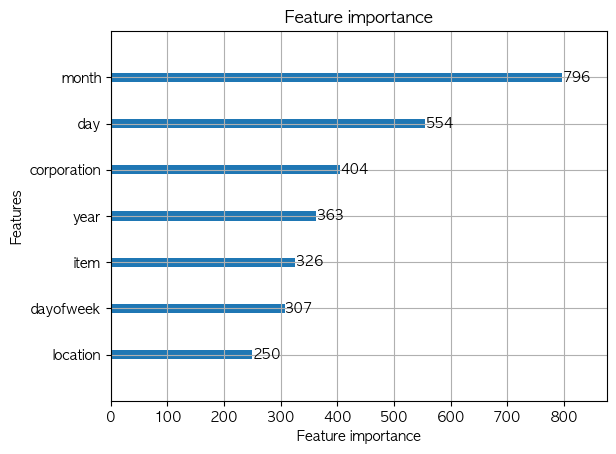

In [61]:
lgb.plot_importance(lgb_clf, max_num_features=10, importance_type='split')
plt.show()

- Catboost 

In [62]:
import catboost as cb
from catboost import CatBoostRegressor

cat_model = cb.CatBoostRegressor(iterations=100, depth=10, learning_rate=0.05)
cat_model.fit(X_train, y_train)

pred_cb_train = cat_model.predict(X_train)
pred_cb_test = cat_model.predict(X_test)

cb_mae_train = mean_absolute_error(y_train, pred_cb_train)
cb_mae_test = mean_absolute_error(y_test, pred_cb_test)
print(f"MAE 학습: {cb_mae_train}, 테스트: {cb_mae_test}")

cb_rmse_train = np.sqrt(mean_squared_error(y_train, pred_cb_train))
cb_rmse_test = np.sqrt(mean_squared_error(y_test,pred_cb_test))
print(f"RMSE 학습: {cb_rmse_train}, 테스트: {cb_rmse_test}")

0:	learn: 1936.5838481	total: 4.67ms	remaining: 462ms
1:	learn: 1873.2740042	total: 6.59ms	remaining: 323ms
2:	learn: 1809.0394147	total: 11.6ms	remaining: 375ms
3:	learn: 1751.8189281	total: 17.6ms	remaining: 422ms
4:	learn: 1696.0712436	total: 20.9ms	remaining: 397ms
5:	learn: 1645.7495282	total: 23.8ms	remaining: 373ms
6:	learn: 1596.8045021	total: 26.4ms	remaining: 351ms
7:	learn: 1552.8331559	total: 28.9ms	remaining: 333ms
8:	learn: 1509.8907966	total: 32.9ms	remaining: 333ms
9:	learn: 1469.2093311	total: 35.6ms	remaining: 320ms
10:	learn: 1431.1246208	total: 38.2ms	remaining: 309ms
11:	learn: 1397.4035178	total: 40.9ms	remaining: 300ms
12:	learn: 1365.1992887	total: 43.6ms	remaining: 292ms
13:	learn: 1336.6448963	total: 46.5ms	remaining: 285ms
14:	learn: 1307.5123546	total: 49.4ms	remaining: 280ms
15:	learn: 1281.7473812	total: 52.6ms	remaining: 276ms
16:	learn: 1256.5062312	total: 55.4ms	remaining: 270ms
17:	learn: 1235.0802070	total: 58.4ms	remaining: 266ms
18:	learn: 1216.1848

### 모델 별 평가지표 점수 비교

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_8802/2543977072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Test_RMSE', data=df_recap, palette='Blues_d')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subse

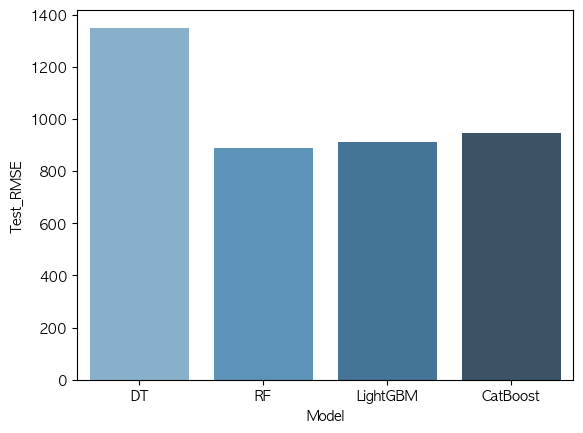

In [63]:
rmse_test = [dt_rmse_test, rf_rmse_test, lgb_rmse_test, cb_rmse_test]
recap_model = ["DT", "RF", "LightGBM", "CatBoost"]
df_recap = pd.DataFrame({'Model':recap_model, 'Test_RMSE':rmse_test})
ax = sns.barplot(x='Model', y='Test_RMSE', data=df_recap, palette='Blues_d')

## Test-Test 정답 비교

In [64]:
test_df.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,dayofweek
0,TG_A_J_20220201,2022-02-01,TG,A,J,0.0,0.0,2022,1,1,1
1,TG_A_J_20220202,2022-02-02,TG,A,J,0.0,0.0,2022,1,2,2
2,TG_A_J_20220203,2022-02-03,TG,A,J,0.0,0.0,2022,1,3,3
3,TG_A_J_20220204,2022-02-04,TG,A,J,535.5,6065.0,2022,1,4,4
4,TG_A_J_20220205,2022-02-05,TG,A,J,5893.0,3113.0,2022,1,5,5


In [65]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           1092 non-null   object        
 1   timestamp    1092 non-null   datetime64[ns]
 2   item         1092 non-null   object        
 3   corporation  1092 non-null   object        
 4   location     1092 non-null   object        
 5   supply(kg)   1092 non-null   float64       
 6   price(원/kg)  1092 non-null   float64       
 7   year         1092 non-null   int32         
 8   month        1092 non-null   int32         
 9   day          1092 non-null   int32         
 10  dayofweek    1092 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(4), object(4)
memory usage: 76.9+ KB


In [105]:
encoding_columns = ['item', 'corporation', 'location'] 
not_encoding_columns = ['ID', 'timestamp', 'price(원/kg)', 'year', 'month', 'day', 'dayofweek']

In [106]:
enc_classes = {}

def encoding_labels(x):
    le = LabelEncoder()
    label = le.fit_transform(x)
    enc_classes[x.name] = le.classes_
    return label

In [107]:
d1 = test_df[encoding_columns].apply(encoding_labels)
d1.head()

,item,corporation,location
0,4,0,0
1,4,0,0
2,4,0,0
3,4,0,0
4,4,0,0


In [108]:
d2 = test_df[not_encoding_columns]
d2

,ID,timestamp,price(원/kg),year,month,day,dayofweek
0,TG_A_J_20220201,2022-02-01,0.0,2022,1,1,1
1,TG_A_J_20220202,2022-02-02,0.0,2022,1,2,2
2,TG_A_J_20220203,2022-02-03,0.0,2022,1,3,3
3,TG_A_J_20220204,2022-02-04,6065.0,2022,1,4,4
4,TG_A_J_20220205,2022-02-05,3113.0,2022,1,5,5
...,...,...,...,...,...,...,...
1087,RD_F_J_20220224,2022-02-24,532.0,2022,12,23,3
1088,RD_F_J_20220225,2022-02-25,520.0,2022,12,24,4
1089,RD_F_J_20220226,2022-02-26,509.0,2022,12,25,5
1090,RD_F_J_20220227,2022-02-27,0.0,2022,12,26,6


In [109]:
test_data = d1.join(d2)
test_data

,item,corporation,location,ID,timestamp,price(원/kg),year,month,day,dayofweek
0,4,0,0,TG_A_J_20220201,2022-02-01,0.0,2022,1,1,1
1,4,0,0,TG_A_J_20220202,2022-02-02,0.0,2022,1,2,2
2,4,0,0,TG_A_J_20220203,2022-02-03,0.0,2022,1,3,3
3,4,0,0,TG_A_J_20220204,2022-02-04,6065.0,2022,1,4,4
4,4,0,0,TG_A_J_20220205,2022-02-05,3113.0,2022,1,5,5
...,...,...,...,...,...,...,...,...,...,...
1087,3,5,0,RD_F_J_20220224,2022-02-24,532.0,2022,12,23,3
1088,3,5,0,RD_F_J_20220225,2022-02-25,520.0,2022,12,24,4
1089,3,5,0,RD_F_J_20220226,2022-02-26,509.0,2022,12,25,5
1090,3,5,0,RD_F_J_20220227,2022-02-27,0.0,2022,12,26,6


In [117]:
X_new = test_data[['item', 'corporation', 'location', 'year', 'month', 'day', 'dayofweek']]
test_predictions = rf_model.predict(X_new)
test_predictions = np.where(test_predictions<0, 0, test_predictions)
test_data['predicted_price'] = test_predictions
test_data.head(10)

,item,corporation,location,ID,timestamp,price(원/kg),year,month,day,dayofweek,predicted_price
0,4,0,0,TG_A_J_20220201,2022-02-01,0.0,2022,1,1,1,68.63
1,4,0,0,TG_A_J_20220202,2022-02-02,0.0,2022,1,2,2,0.00
2,4,0,0,TG_A_J_20220203,2022-02-03,0.0,2022,1,3,3,1767.05
3,4,0,0,TG_A_J_20220204,2022-02-04,6065.0,2022,1,4,4,1671.60
4,4,0,0,TG_A_J_20220205,2022-02-05,3113.0,2022,1,5,5,1702.76
5,4,0,0,TG_A_J_20220206,2022-02-06,0.0,2022,1,6,6,0.00
6,4,0,0,TG_A_J_20220207,2022-02-07,2298.0,2022,1,7,0,1777.43
7,4,0,0,TG_A_J_20220208,2022-02-08,2483.0,2022,1,8,1,1660.26
8,4,0,0,TG_A_J_20220209,2022-02-09,2500.0,2022,1,9,2,1616.27
9,4,0,0,TG_A_J_20220210,2022-02-10,2075.0,2022,1,10,3,1650.54


In [114]:
test_predictions

array([  68.63,    0.  , 1767.05, ...,  529.24,    0.  ,  498.91])

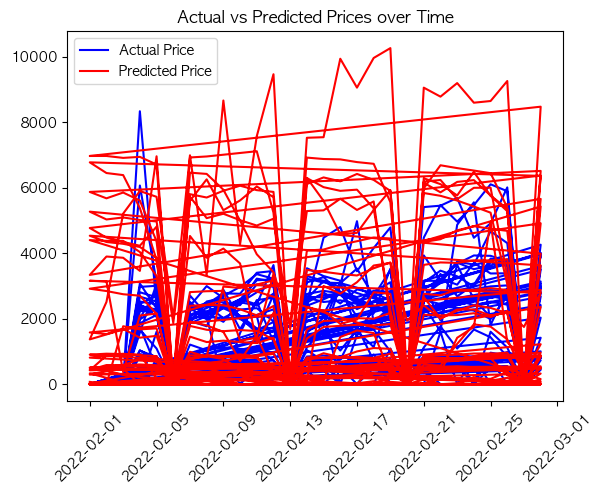

In [120]:
plt.plot(test_data['timestamp'], test_data['price(원/kg)'], label='Actual Price', color='blue')
plt.plot(test_data['timestamp'], test_data['predicted_price'], label='Predicted Price', color='red')
# plt.plot(test_predictions)
plt.title('Actual vs Predicted Prices over Time')
plt.xticks(rotation=45) 
plt.legend()
plt.show()

In [88]:
print(test_data.columns)

Index(['item', 'corporation', 'location', 'ID', 'timestamp', 'year', 'month',
       'day', 'dayofweek', 'predicted_price'],
      dtype='object')
